In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Data_Train.csv')
test = pd.read_csv('Data_Test.csv')

In [10]:
total = pd.concat([train,test],axis=0)

In [3]:
train.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


In [4]:
train.shape,test.shape

((78458, 11), (19615, 10))

In [5]:
train.nunique()

Unique_ID     78458
Name           1209
Genre            21
Country           1
Song_Name     78457
Timestamp     68187
Views         53964
Comments       2152
Likes          9214
Popularity     5719
Followers      1153
dtype: int64

In [6]:
test.nunique()

Unique_ID     19615
Name           1115
Genre            21
Country           1
Song_Name     19615
Timestamp     17810
Comments       1123
Likes          5415
Popularity     2989
Followers      1081
dtype: int64

In [7]:
train['Likes'] = train['Likes'].str.replace(',', '')
train['Popularity'] = train['Popularity'].str.replace(',', '')
train['Likes'] = train['Likes'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)
train['Popularity'] = train['Popularity'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

In [8]:
test['Likes'] = test['Likes'].str.replace(',', '')
test['Popularity'] = test['Popularity'].str.replace(',', '')
test['Likes'] = test['Likes'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)
test['Popularity'] = test['Popularity'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

In [9]:
train.fillna(value = 'Unknown',inplace=True)

In [11]:
total.head()

,Comments,Country,Followers,Genre,Likes,Name,Popularity,Song_Name,Timestamp,Unique_ID,Views
0,4,AU,119563,danceedm,499.0,Hardstyle,97.0,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,413890,14017.0
1,17,AU,2141,danceedm,49.0,Dj Aladdin,17.0,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,249453,1918.0
2,11,AU,22248,danceedm,312.0,Maxximize On Air,91.0,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,681116,9668.0
3,2,AU,393655,rbsoul,2400.0,GR6 EXPLODE,76.0,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,387253,113036.0
4,81,AU,201030,danceedm,3031.0,Tritonal,699.0,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,1428029,110024.0


In [12]:
total['Song_Name'] = total['Song_Name'].str.replace('\W', ' ')
total['Name'] = total['Name'].str.replace('\W', ' ')

In [13]:
total['Song_Name'] = total['Song_Name'].str.lower()
total['Name'] = total['Name'].str.lower()

In [14]:
total['Song_Name'] = total['Song_Name'].str.split()
total['Name'] = total['Name'].str.split()

In [15]:
from nltk.corpus import stopwords

In [16]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text
total['Song_Name'] = total.Song_Name.apply(lambda x : word_lemmatizer(x))
print('done')
total['Name'] = total['Name'].apply(lambda x : word_lemmatizer(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hrajs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


done


In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrajs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stemmer = PorterStemmer()
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text
total['Song_Name'] = total['Song_Name'].apply(lambda x : word_stemmer(x))
total['Name'] = total['Name'].apply(lambda x : word_stemmer(x))

In [19]:
total["Song_Name"]= total["Song_Name"].str.replace("remix", "mix")
total["Song_Name"]= total["Song_Name"].str.replace("feat", "ft")
total["Name"]= total["Name"].str.replace("remix", "mix")
total["Name"]= total["Name"].str.replace("feat", "ft")

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidf = TfidfVectorizer(max_features=2, stop_words='english',ngram_range=(2,2))
tf = tfidf.fit_transform(total['Song_Name'])
cv = CountVectorizer(max_features=6, stop_words='english')
cv_song_name = cv.fit_transform(total['Song_Name'])
print(tf.shape)
print(tfidf.get_feature_names)
print(cv_song_name.shape)
print(cv.get_feature_names)

(98073, 2)
<bound method CountVectorizer.get_feature_names of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2,
                min_df=1, ngram_range=(2, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)>
(98073, 6)
<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=6, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          

In [74]:
feature_tfidf = tfidf.get_feature_names()
dense = tf.todense()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns=feature_tfidf)
df_tfidf

,free download,origin mix
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [75]:
feature_cv = cv.get_feature_names()
dense = cv_song_name.todense()
denselist = dense.tolist()
df_cv = pd.DataFrame(denselist, columns=feature_cv)
df_cv

,dj,ft,mc,mix,premier,prod
0,0,0,0,0,0,0
1,1,0,0,1,0,0
2,0,0,0,1,0,0
3,1,0,1,0,0,0
4,0,1,0,0,0,0
5,0,0,0,0,0,1
6,0,0,0,1,0,0
7,0,1,0,1,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [78]:
# df_cv['beat'][df_cv['beat']>1]=1
df_cv['dj'][df_cv['dj']>1]=1
df_cv['ft'][df_cv['ft']>1]=1
df_cv['prod'][df_cv['prod']>1]=1
df_cv['mc'][df_cv['mc']>1]=1
df_cv['mix'][df_cv['mix']>1]=1
df_cv['premier'][df_cv['premier']>1]=1
# df_cv['record'][df_cv['record']>1]=1

In [79]:
df_tfidf['free download'][df_tfidf['free download']>0]=1
df_tfidf['origin mix'][df_tfidf['origin mix']>0]=1

In [80]:
total.Timestamp = pd.to_datetime(total.Timestamp)

In [81]:
train.Timestamp = pd.to_datetime(train.Timestamp)

In [82]:
total.set_index('Timestamp', drop = False, inplace = True)

In [83]:
total.index

DatetimeIndex(['2018-03-30 15:24:45', '2016-06-20 05:58:52',
               '2015-05-08 17:45:59', '2017-06-08 23:50:03',
               '2016-09-17 20:50:19', '2017-11-27 14:55:11',
               '2016-01-22 17:23:26', '2012-01-17 00:00:00',
               '2018-11-29 22:37:07', '2017-09-28 04:07:47',
               ...
               '2016-06-16 10:28:59', '2019-02-22 15:53:42',
               '2017-12-12 17:10:27', '2018-05-18 01:30:02',
               '2012-09-17 23:07:43', '2017-08-29 20:39:57',
               '2016-01-22 13:51:52', '2017-10-27 04:51:20',
               '2017-08-30 16:35:20', '2015-07-30 16:27:55'],
              dtype='datetime64[ns]', name='Timestamp', length=98073, freq=None)

In [84]:
total = total.tz_localize(tz='Australia/ACT',ambiguous=True,nonexistent='shift_backward')

In [85]:
from pandas.tseries.holiday import *
from dateutil.relativedelta import MO
from pandas import DateOffset, Series, Timestamp, date_range
from pandas.tseries.offsets import Day, Easter

class AUHolidays(AbstractHolidayCalendar):
    rules = {
        Holiday('New Year',day=1,month=1),
        Holiday('Australia Day',day=26,month=1,observance=next_monday),
        Holiday('Canberra Day',month=3, day=1,
                                offset=pd.DateOffset(weekday=MO(2))),
        Holiday("Good Friday", month=1, day=1, offset=[Easter(), Day(-2)]),
        Holiday("Easter Monday", month=1, day=1, offset=[Easter(), Day(1)]),
        Holiday("ANZAC day", month=4, day=25),
        Holiday('Queens BDay',month=6, day=1,
                                offset=pd.DateOffset(weekday=MO(2))),
        Holiday('Christmas Day',month=12,day=25),
        Holiday('Boxing Day',month=12,day=26,observance=next_workday)
    }

In [86]:
cal = AUHolidays()
h = cal.holidays(start=total.index.min(), end=total.index.max())

total['Holiday'] = total.index.isin(h)

In [87]:
total['Holiday'].value_counts()

False    95989
True      2084
Name: Holiday, dtype: int64

In [88]:
total['Year'] = total.index.year
total['Month'] = total.index.month
total['Day'] = total.index.day

total['Dayofweek'] = total.index.day_name()
total['Weekofyear'] = total.index.weekofyear
total['Hour'] = total.index.hour
total['Minute'] = total.index.minute
total['Dayofyear'] = total.index.dayofyear

total['is_year_end'] = total.index.is_year_end
total['is_year_start'] = total.index.is_year_start
total['quarter'] = total.index.quarter
total['Weekend'] = ((pd.DatetimeIndex(total.index).dayofweek) // 5 == 1).astype(float)

# total.drop(['Timestamp'],axis=1,inplace=True)



In [89]:
total['var1'] = total['Likes']/total['Comments']
total['var2'] = total['Comments']/total['Popularity']
total['var3'] = total['Comments']/total['Followers']
total['var4'] = total['Likes']/total['Popularity']
total['var5'] = total['Followers']/total['Popularity']
total['var6'] = (total['Comments']+total['Likes'])*total['Popularity']
total['var7'] = total['Followers']/total['var6']

In [90]:
total['day_since'] = (pd.to_datetime('2020-01-01',utc=False).tz_localize(tz='Australia/ACT') - total.index)

In [91]:
total['day_since'] = total['day_since'].dt.days

In [93]:
total['year_since'] = 2020-total['Year']

In [94]:
total['day_since/year_since'] = total['day_since']/total['year_since']

In [95]:
total['var8'] = total['Comments']*total['Followers']
total['var9'] = total['Comments']*total['Likes']
total['var10'] = total['Comments']*total['Popularity']
total['var11'] = total['Likes']*total['Followers']
total['var12'] = total['Likes']*total['Popularity']
total['var13'] = (total['Comments']/total['Likes'])*total['Followers']
total['var14'] = total['Popularity']/total['year_since']
total['var15'] = total['Likes']*total['year_since']

In [100]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98073 entries, 0 to 98072
Data columns (total 42 columns):
Comments                98073 non-null int64
Country                 98073 non-null object
Followers               98073 non-null int64
Genre                   98073 non-null object
Likes                   98073 non-null float64
Name                    98073 non-null object
Popularity              98073 non-null float64
Song_Name               98073 non-null object
Timestamp               98073 non-null datetime64[ns]
Unique_ID               98073 non-null int64
Views                   78458 non-null float64
Holiday                 98073 non-null float64
Year                    98073 non-null int64
Month                   98073 non-null int64
Day                     98073 non-null int64
Dayofweek               98073 non-null object
Weekofyear              98073 non-null int64
Hour                    98073 non-null int64
Minute                  98073 non-null int64
Dayofyear     

In [97]:
total.index=total.index.tz_convert(None)

In [98]:
total.reset_index(inplace=True, drop=True)

In [99]:
total['Holiday'] = total['Holiday'].astype(float)
total['is_year_end'] = total['is_year_end'].astype(float)
total['is_year_start'] = total['is_year_start'].astype(float)

In [101]:
d_name = pd.get_dummies(total['Name'],drop_first=True)
d_genre = pd.get_dummies(total['Genre'],drop_first=True)
d_day = pd.get_dummies(total['Dayofweek'],drop_first=True)

In [104]:
data = pd.concat([total.drop(columns=['Country','Genre','Name','Song_Name','Timestamp','Unique_ID',
                                     'Views','Dayofweek','day_since']),df_tfidf,df_cv],axis=1)

In [105]:
data1 = pd.concat([data,d_genre,d_day,d_name],axis=1,ignore_index=True)

In [106]:
i=0
for y in data1.columns:
    data1.rename(columns={y: str(y)+"_"+str(i)},inplace=True)
    i+=1

In [107]:
colsname = data1.columns

In [133]:
l1=train.shape[0]
train1=data1.iloc[:l1,:]
test1=data1.iloc[l1:,:]

In [134]:
train1.shape,test1.shape

((78458, 275), (19615, 275))

In [142]:
train2 = train1.iloc[:,:150]
test2 = test1.iloc[:,:150]

In [143]:
train2.shape,test2.shape

((78458, 150), (19615, 150))

In [110]:
target = train['Views']
target_log = np.log1p(train['Views'])
# train.drop(['Views','log_views'],axis=1,inplace=True)

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train1,target_log, test_size = 0.20, random_state = 1729)

In [155]:
from sklearn.metrics import mean_squared_error

In [157]:
from xgboost import XGBRegressor
n=XGBRegressor(n_estimators=30000,random_state=17291, learning_rate=0.03,n_jobs=4)
n.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_valid, y_valid.values)], early_stopping_rounds=200,verbose=200)
p=n.predict(X_valid)
print(np.sqrt(mean_squared_error(y_valid,p)))

[18:35:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9.65649	validation_1-rmse:9.66424
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.56836	validation_1-rmse:0.584505
[400]	validation_0-rmse:0.535571	validation_1-rmse:0.553569
[600]	validation_0-rmse:0.514795	validation_1-rmse:0.535329
[800]	validation_0-rmse:0.493974	validation_1-rmse:0.516556
[1000]	validation_0-rmse:0.476429	validation_1-rmse:0.500511
[1200]	validation_0-rmse:0.464976	validation_1-rmse:0.490408
[1400]	validation_0-rmse:0.455122	validation_1-rmse:0.482175
[1600]	validation_0-rmse:0.446602	validation_1-rmse:0.475084
[1800]	validation_0-rmse:0.438825	validation_1-rmse:0.468776
[2000]	validation_0-rmse:0.433481	validation_1-rmse:0.464363
[2200]	validation_0-rmse:0.427168	validation_1-rmse:0.459347
[2

In [127]:
feat_imp = pd.DataFrame(list(zip(train1,n.feature_importances_)),columns =['feature','importance'])
feat_imp.sort_values(by='importance',inplace=True,ascending=False)
feat_imp

,feature,importance
2,2_2,0.573995
26,26_26,0.091911
29,29_29,0.050094
32,32_32,0.033853
197,197_197,0.030978
712,712_712,0.021084
19,19_19,0.016444
21,21_21,0.013346
719,719_719,0.010266
31,31_31,0.008528


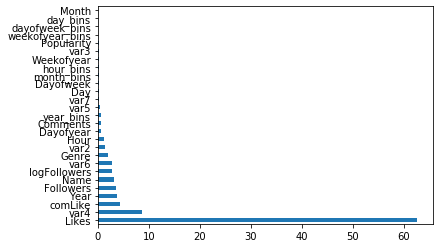

In [665]:
feat_importances = pd.Series(n.feature_importances_, index=train.columns)
feat_importances.nlargest(30).plot(kind='barh')